In [1]:
import sys
import os
from pathlib import Path

import cv2

project_path = Path.cwd().parent

sys.path.append(str(project_path))

from src.mowing_terrain_seg.inference import predictor

In [10]:
pred = predictor.SegPredictor(
    cfg_uri='/workspaces/mowing-terrain-seg/work_dirs_old/mask2former_r50_8xb2-90k_ycor-1024x544/baseline1/mask2former_r50_8xb2-90k_ycor-1024x544.py',
    model_uri='/workspaces/mowing-terrain-seg/work_dirs_old/mask2former_r50_8xb2-90k_ycor-1024x544/baseline1/best_val_mIoU_iter_50000.pth',
    backend=predictor.Backend.TORCH,
    conf_thresholds=0.4
)

Loads checkpoint by local backend from path: /workspaces/mowing-terrain-seg/work_dirs_old/mask2former_r50_8xb2-90k_ycor-1024x544/baseline1/best_val_mIoU_iter_50000.pth


In [11]:
pred.cfg['num_classes']

3

In [12]:
img_data = cv2.imread('/workspaces/mowing-terrain-seg/assets/image/iid000862_rgb.jpg')

In [13]:
# preped, is_batch = pred._prepare_data(img_data)
# preprosed = pred._preprocess(preped)

In [14]:
mask_out = pred(img_data)

In [15]:
import numpy as np

np.unique(mask_out)

array([  0,   1,   2, 255], dtype=uint8)

In [16]:
palette = ['green', 'yellow', 'red']
overlay = pred.visualize_mask(img_data, mask_out, palette=palette)

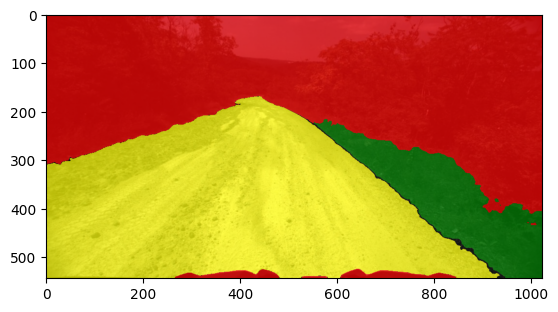

In [17]:
from matplotlib import pyplot as plt


overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
plt.imshow(overlay_rgb)